In [26]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

In [2]:
conn = sqlite3.connect('assessment.db')
cursor = conn.cursor()

In [3]:
# loading users dataset

users_df = pd.read_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/USER_TAKEHOME.csv')
print("File loaded successfully!")

# Display first few rows for verification
print(users_df.head())

File loaded successfully!
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [4]:
# loading products dataset

products_df = pd.read_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/PRODUCTS_TAKEHOME.csv')
print("File loaded successfully!")

# Display first few rows for verification
print(products_df.head())

File loaded successfully!
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2  

In [5]:
# loading transactions dataset

transactions_df = pd.read_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/TRANSACTION_TAKEHOME.csv')
print("File loaded successfully!")

# Display first few rows for verification
print(transactions_df.head())

File loaded successfully!
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10           1.00             
1           NaN           zero       1.49  
2  7.874223e+10           1.00             
3  7.833997e+11           zero       3.4

In [9]:
users_df.to_sql('users', conn, if_exists='replace', index=False)

100000

In [10]:
products_df.to_sql('products', conn, if_exists='replace', index=False)

845552

In [11]:
transactions_df.to_sql('transactions', conn, if_exists='replace', index=False)

50000

In [12]:
# Checking for duplicate rows in each dataset

print("\nDuplicate Rows in Users Dataset:", users_df.duplicated().sum())
print("Duplicate Rows in Products Dataset:", products_df.duplicated().sum())
print("Duplicate Rows in Transactions Dataset:", transactions_df.duplicated().sum())


Duplicate Rows in Users Dataset: 0
Duplicate Rows in Products Dataset: 215
Duplicate Rows in Transactions Dataset: 171


In [28]:
# Drop duplicate rows in products dataset
products_df = products_df.drop_duplicates()
print("Duplicates removed from Products Dataset. New shape:", products_df.shape)

# Drop duplicate rows in transactions dataset
transactions_df = transactions_df.drop_duplicates()
print("Duplicates removed from Transactions Dataset. New shape:", transactions_df.shape)

Duplicates removed from Products Dataset. New shape: (845337, 7)
Duplicates removed from Transactions Dataset. New shape: (49829, 8)


In [13]:
# Checking for missing values in each dataset
print("Missing Values in Users Dataset:")
print(users_df.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())

Missing Values in Users Dataset:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

Missing Values in Products Dataset:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

Missing Values in Transactions Dataset:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [14]:
# Checking data types of each column
print("\nUsers Dataset Data Types:")
print(users_df.dtypes)

print("\nProducts Dataset Data Types:")
print(products_df.dtypes)

print("\nTransactions Dataset Data Types:")
print(transactions_df.dtypes)


Users Dataset Data Types:
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

Products Dataset Data Types:
CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

Transactions Dataset Data Types:
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


In [33]:
# USERS DATASET: Convert Dates to Datetime
users_df['CREATED_DATE'] = users_df['CREATED_DATE'].dt.tz_localize(None)
users_df['BIRTH_DATE'] = users_df['BIRTH_DATE'].dt.tz_localize(None)

# PRODUCTS DATASET
products_df['BARCODE'] = products_df['BARCODE'].astype(str)

# TRANSACTIONS DATASET
transactions_df['PURCHASE_DATE'] = transactions_df['PURCHASE_DATE'].dt.tz_localize(None)
transactions_df['SCAN_DATE'] = transactions_df['SCAN_DATE'].dt.tz_localize(None)
transactions_df['BARCODE'] = transactions_df['BARCODE'].astype(str)
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# Verify the updated data types
print("\nUpdated Users Dataset Data Types:\n", users_df.dtypes)
print("\nUpdated Products Dataset Data Types:\n", products_df.dtypes)
print("\nUpdated Transactions Dataset Data Types:\n", transactions_df.dtypes)


Updated Users Dataset Data Types:
 ID                      object
CREATED_DATE    datetime64[ns]
BIRTH_DATE      datetime64[ns]
STATE                   object
LANGUAGE                object
GENDER                  object
AGE                    float64
dtype: object

Updated Products Dataset Data Types:
 CATEGORY_1      object
CATEGORY_2      object
CATEGORY_3      object
CATEGORY_4      object
MANUFACTURER    object
BRAND           object
BARCODE         object
dtype: object

Updated Transactions Dataset Data Types:
 RECEIPT_ID                object
PURCHASE_DATE     datetime64[ns]
SCAN_DATE         datetime64[ns]
STORE_NAME                object
USER_ID                   object
BARCODE                   object
FINAL_QUANTITY           float64
FINAL_SALE               float64
dtype: object


In [60]:
# Count invalid records where BIRTH_DATE is after CREATED_DATE
invalid_dates_count = (users_df['BIRTH_DATE'] > users_df['CREATED_DATE']).sum()
print(f"Number of users with invalid birth dates: {invalid_dates_count}")

Number of users with invalid birth dates: 0


In [61]:
# Count invalid records where SCAN_DATE is before PURCHASE_DATE
invalid_scan_dates_count = (transactions_df['SCAN_DATE'] < transactions_df['PURCHASE_DATE']).sum()
print(f"Number of transactions with invalid scan dates: {invalid_scan_dates_count}")

Number of transactions with invalid scan dates: 94


In [62]:
# Remove invalid records
transactions_df = transactions_df[transactions_df['SCAN_DATE'] >= transactions_df['PURCHASE_DATE']]

# Confirm removal
print(f"Remaining transactions after fixing date inconsistencies: {len(transactions_df)}")

Remaining transactions after fixing date inconsistencies: 49735


In [70]:
# Find entries where FINAL_QUANTITY > 0 and FINAL_SALE is null
invalid_sales_entries = transactions_df[(transactions_df['FINAL_QUANTITY'] > 0) & 
                                        (transactions_df['FINAL_SALE'].isnull())]

# Display the count of such entries
print(f"Number of transactions with FINAL_QUANTITY > 0 and FINAL_SALE missing: {len(invalid_sales_entries)}")

Number of transactions with FINAL_QUANTITY > 0 and FINAL_SALE missing: 12468


In [76]:
# Find entries where FINAL_QUANTITY is less than 1 (including decimal values)
invalid_quantity_entries = transactions_df[transactions_df['FINAL_QUANTITY'] < 1]

# Display the count of such entries
print(f"Number of transactions with FINAL_QUANTITY < 1: {len(invalid_quantity_entries)}")

# Display first few rows for verification
print(invalid_quantity_entries.head())

Number of transactions with FINAL_QUANTITY < 1: 32
                                RECEIPT_ID PURCHASE_DATE  \
3188  2057913b-b444-4a4f-9935-3bc72a13f1b9    2024-07-28   
3878  277b1f93-4de0-47bf-a094-319de868e601    2024-08-26   
6046  3dbe1f4c-6649-47b0-8328-7fc893efbb31    2024-07-07   
6810  459b41f8-ab7d-4569-9b0b-364e2dd97486    2024-06-13   
7986  52660cb5-3c6a-42be-aa87-97055c93c6cb    2024-08-08   

                   SCAN_DATE      STORE_NAME                   USER_ID  \
3188 2024-08-03 09:44:59.328          MEIJER  652efc6ca65d634c1c298c09   
3878 2024-08-26 11:56:03.764          MEIJER  5fa7cf2a974a6c126e73e84c   
6046 2024-07-08 20:58:08.868  KEY FOOD FRESH  5f299c8180f26b20811a4e70   
6810 2024-06-13 21:59:17.239         WALMART  62a28fae1f9dbf1584c6bf58   
7986 2024-08-08 18:34:12.588         WALMART  63a4827cb5f32149b9d7b423   

             BARCODE  FINAL_QUANTITY  FINAL_SALE  
3188             nan            0.46         NaN  
3878         40945.0            0.23     

In [77]:
# Remove transactions where FINAL_QUANTITY is less than 1
transactions_df = transactions_df[transactions_df['FINAL_QUANTITY'] >= 1]

# Confirm removal
print(f"Remaining transactions after dropping FINAL_QUANTITY < 1: {len(transactions_df)}")

Remaining transactions after dropping FINAL_QUANTITY < 1: 37241


In [78]:
# Round FINAL_QUANTITY to the nearest integer
transactions_df['FINAL_QUANTITY'] = transactions_df['FINAL_QUANTITY'].round().astype(int)

# Confirm changes
print("FINAL_QUANTITY rounded to nearest integer successfully!")

# Display few rows for verification
print(transactions_df[['FINAL_QUANTITY']].head())  

FINAL_QUANTITY rounded to nearest integer successfully!
   FINAL_QUANTITY
0               1
2               1
4               1
6               1
8               1


VISUALIZATIONS FOR USERS DATASET

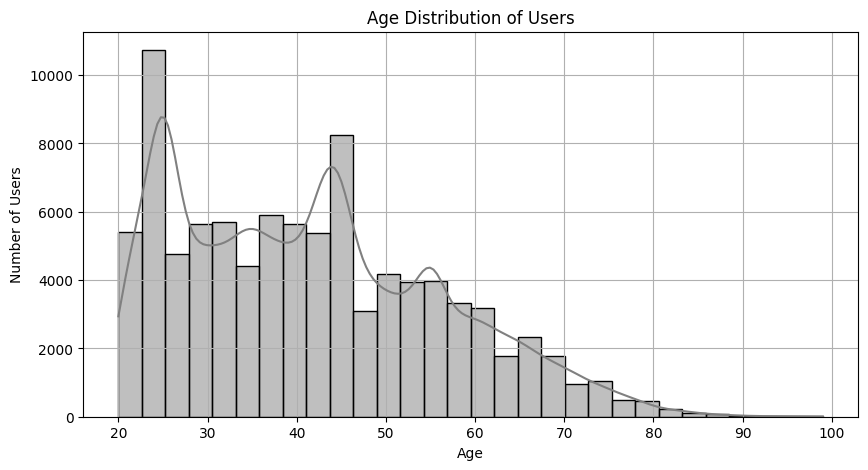

In [53]:
# Convert BIRTH_DATE to datetime and extract birth year
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')

# Assuming current year is 2025
users_df['AGE'] = 2025 - users_df['BIRTH_DATE'].dt.year  

# Drop rows where AGE could not be computed
users_df = users_df.dropna(subset=['AGE'])

# Plot Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(users_df['AGE'], bins=30, kde=True, color='gray')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [51]:
# Count users with age less than 18 or greater than 100
invalid_age_users = users_df[(users_df['AGE'] < 18) | (users_df['AGE'] > 100)]
print("Number of users with unrealistic ages:", len(invalid_age_users))

Number of users with unrealistic ages: 0


In [52]:
# Drop users with unrealistic ages if the count is small

# Assuming 1500 as a threshold for "too many"
if len(invalid_age_users) < 1500:  
    users_df = users_df[(users_df['AGE'] >= 18) & (users_df['AGE'] <= 100)]
    users_df.reset_index(drop=True, inplace=True)
    print("Unrealistic age users removed. New dataset shape:", users_df.shape)
else:
    print("Too many unrealistic ages. Consider investigating further.")

Unrealistic age users removed. New dataset shape: (92880, 7)


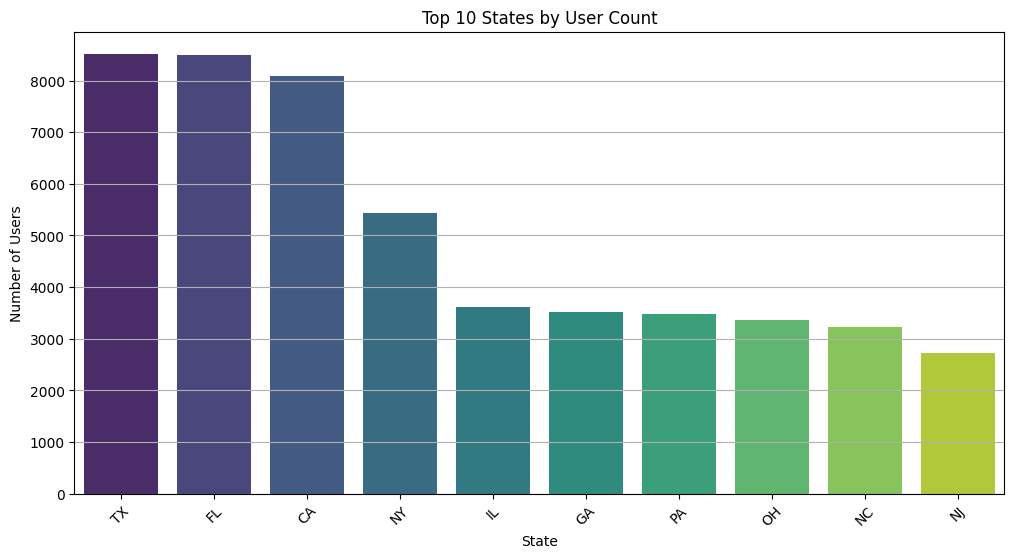

In [24]:
# Replace missing states with 'Unknown'
users_df['STATE'] = users_df['STATE'].fillna('Unknown')

# Count users by state
state_counts = users_df['STATE'].value_counts().head(10)  

# Show top 10 states
# Plot State Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='viridis', legend=False)
plt.title('Top 10 States by User Count')
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [31]:
# Get unique gender values
print("Unique gender values in dataset:", users_df['GENDER'].unique())

# Standardizing gender values
users_df['GENDER'] = users_df['GENDER'].replace({
    'Non-Binary': 'non_binary',  # Standardize capitalization
    'non_binary': 'non_binary',  # Keep consistent format
    "My gender isn't listed": 'not_specified',
    'not_specified': 'not_specified',
    'unknown': 'not_specified',
    'not_listed': 'not_specified',
    'Prefer not to say': 'prefer_not_to_say',
    'prefer_not_to_say': 'prefer_not_to_say'
})

# Ensure missing values remain NaN
# Convert empty strings to NaN
users_df['GENDER'] = users_df['GENDER'].replace('', np.nan)  
users_df['GENDER'] = users_df['GENDER'].fillna(np.nan)  

# Count the number of users by gender
# Includes NaN values
gender_counts = users_df['GENDER'].value_counts(dropna=False)  
print("\nUser count by gender:\n", gender_counts)

Unique gender values in dataset: ['female' 'male' 'non_binary' 'transgender' nan 'prefer_not_to_say'
 'not_specified']

User count by gender:
GENDER
female               62203
male                 24606
NaN                   2277
transgender           1687
prefer_not_to_say     1263
non_binary             468
not_specified          376
Name: count, dtype: int64


VISUALIZATIONS FOR PRODUCTS DATASET

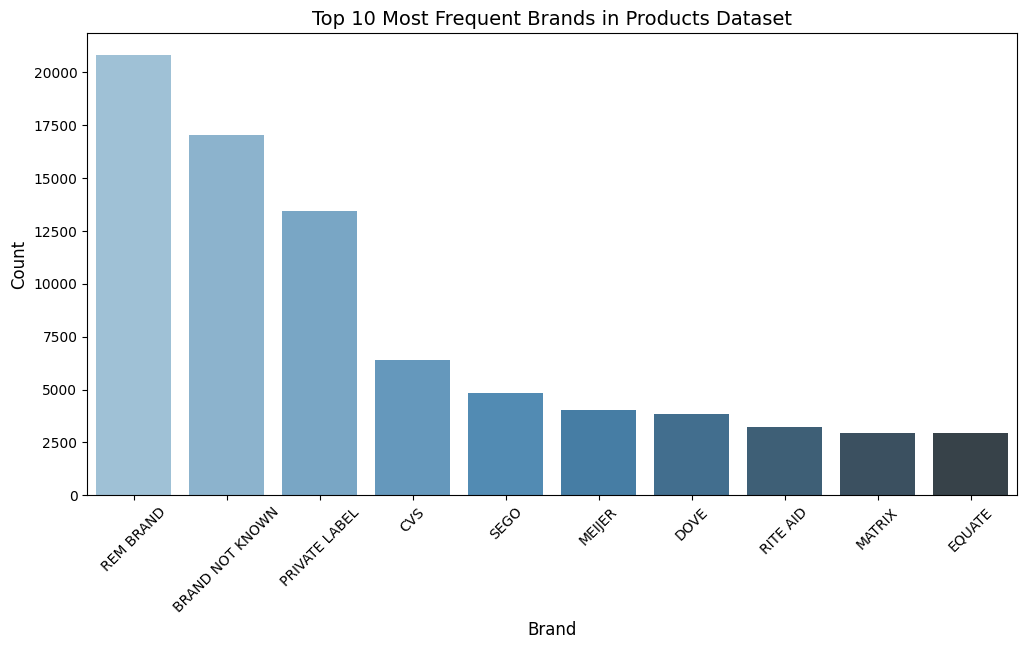

In [59]:
# Count top 10 most frequent brands
top_brands = products_df['BRAND'].dropna().value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, hue=state_counts.index, palette='Blues_d', legend=False)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 10 Most Frequent Brands in Products Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.show()

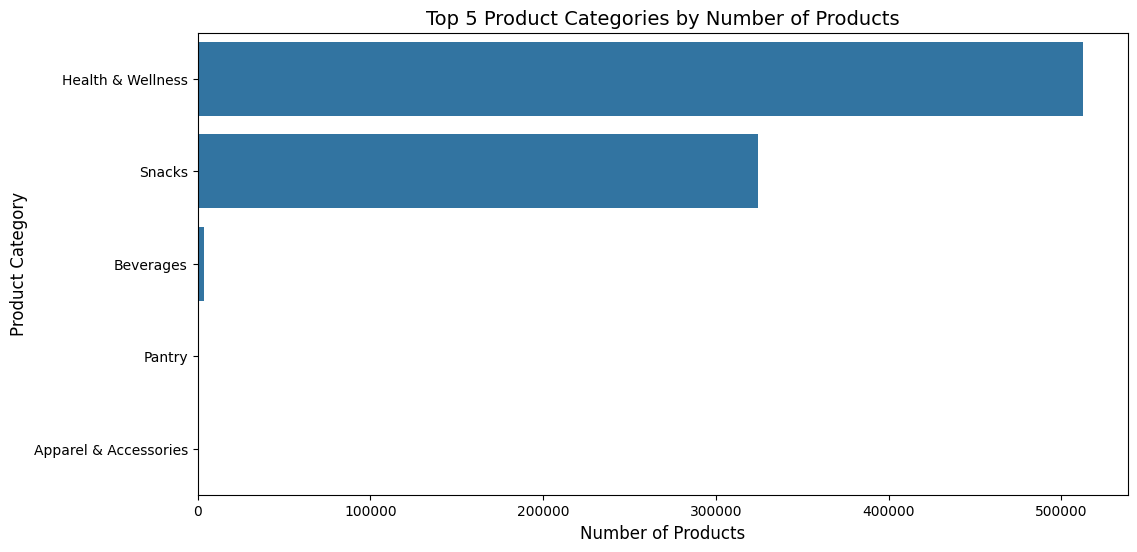

In [116]:
# Count occurrences of each CATEGORY_1
# Top 5 categories
category_counts = products_df['CATEGORY_1'].dropna().value_counts().head(5)  

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.ylabel("Product Category", fontsize=12)
plt.xlabel("Number of Products", fontsize=12)
plt.title("Top 5 Product Categories by Number of Products", fontsize=14)
plt.show()

In [ ]:
VISUALIZATIONS FOR TRANSACTIONS DATASET

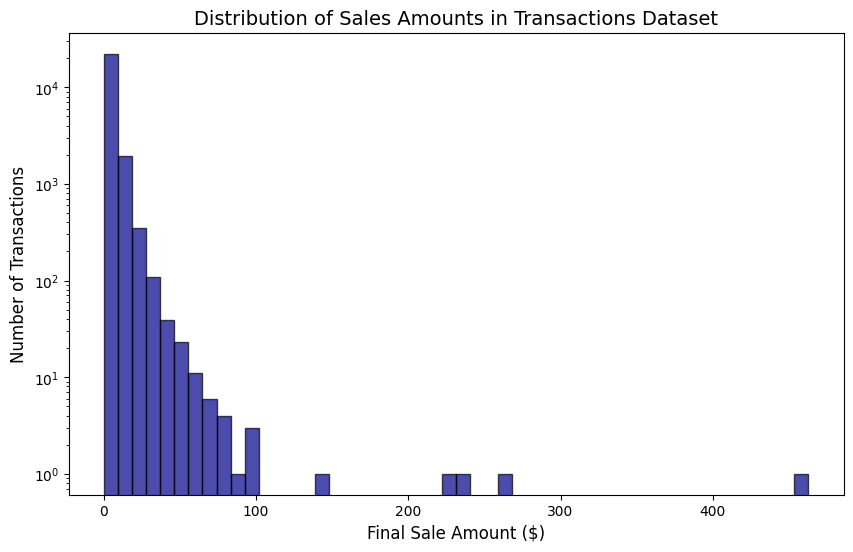

In [79]:
# Plot histogram of FINAL_SALE
plt.figure(figsize=(10, 6))
plt.hist(transactions_df['FINAL_SALE'], bins=50, color='darkblue', edgecolor='black', alpha=0.7)
plt.xlabel("Final Sale Amount ($)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Distribution of Sales Amounts in Transactions Dataset", fontsize=14)
plt.yscale("log")  
plt.show()

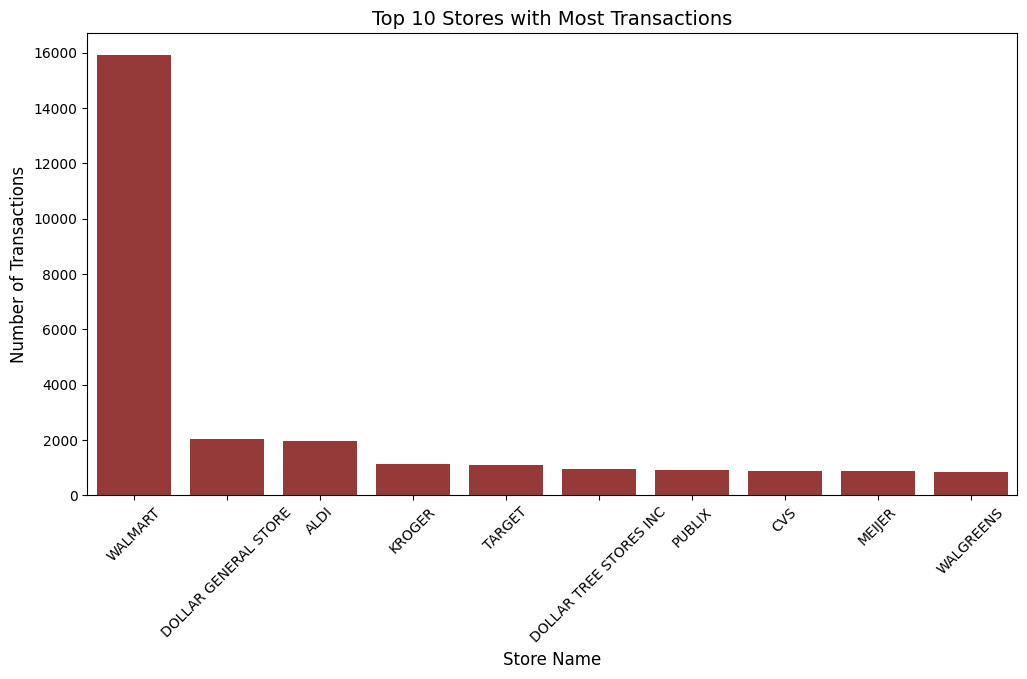

In [80]:
# Count occurrences of each store
top_stores = transactions_df['STORE_NAME'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stores.index, y=top_stores.values, color="brown")
plt.xlabel("Store Name", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Top 10 Stores with Most Transactions", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [81]:
# Print number of entries in each dataset
print(f"Number of entries in Users dataset: {users_df.shape[0]}")
print(f"Number of entries in Products dataset: {products_df.shape[0]}")
print(f"Number of entries in Transactions dataset: {transactions_df.shape[0]}")

Number of entries in Users dataset: 92880
Number of entries in Products dataset: 845337
Number of entries in Transactions dataset: 37241


In [82]:
# Count missing values in Users dataset
missing_users = users_df.isnull().sum()
print("\nMissing values in Users dataset after cleaning:\n", missing_users)

# Count missing values in Products dataset
missing_products = products_df.isnull().sum()
print("\nMissing values in Products dataset after cleaning:\n", missing_products)

# Count missing values in Transactions dataset
missing_transactions = transactions_df.isnull().sum()
print("\nMissing values in Transactions dataset after cleaning:\n", missing_transactions)


Missing values in Users dataset after cleaning:
 ID                  0
CREATED_DATE        0
BIRTH_DATE          0
STATE               0
LANGUAGE        29464
GENDER           2277
AGE                 0
dtype: int64

Missing values in Products dataset after cleaning:
 CATEGORY_1         111
CATEGORY_2        1422
CATEGORY_3       60563
CATEGORY_4      777884
MANUFACTURER    226464
BRAND           226462
BARCODE              0
dtype: int64

Missing values in Transactions dataset after cleaning:
 RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE               0
FINAL_QUANTITY        0
FINAL_SALE        12460
dtype: int64


In [83]:
# Save cleaned Users dataset
users_df.to_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/Cleaned Files/cleaned_USERS_TAKEHOME.csv', index=False)
print("Cleaned Users dataset saved successfully!")

# Save cleaned Products dataset
products_df.to_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/Cleaned Files/cleaned_PRODUCTS_TAKEHOME.csv', index=False)
print("Cleaned Products dataset saved successfully!")

# Save cleaned Transactions dataset
transactions_df.to_csv('C:/Users/vaitl/OneDrive/Desktop/Fetch Rewards/Cleaned Files/cleaned_TRANSACTIONS_TAKEHOME.csv', index=False)
print("Cleaned Transactions dataset saved successfully!")

Cleaned Users dataset saved successfully!
Cleaned Products dataset saved successfully!
Cleaned Transactions dataset saved successfully!


In [92]:
# Top 5 brands by receipts scanned among users 21 and over

query1= '''
SELECT p.brand, COUNT(t.receipt_id) AS receipt_count
FROM transactions t
JOIN users u ON t.user_id=u.id
JOIN products p ON t.barcode=p.barcode
WHERE (strftime('%Y', DATE('now')) - strftime('%Y', u.birth_date))>=21 and p.brand is not NULL
GROUP BY p.brand
ORDER BY receipt_count DESC
LIMIT 5;
'''

top_brand_by_receipts = pd.read_sql(query1, conn)
print("\nTop 5 brands by recipts: \n",top_brand_by_receipts)


Top 5 brands by recipts: 
              BRAND  receipt_count
0      NERDS CANDY              6
1             DOVE              6
2          TRIDENT              4
3  SOUR PATCH KIDS              4
4           MEIJER              4


In [101]:
# Top 5 brands by sales among users with account at least six months old

query2 = '''
SELECT p.brand, SUM(t.final_sale) AS total_sales
FROM transactions t
JOIN users u ON t.user_id = u.id
JOIN products p ON t.barcode = p.barcode
WHERE DATE('now') >= DATE(u.created_date, '+6 months') AND p.brand IS NOT NULL
GROUP BY p.brand
ORDER BY total_sales DESC
LIMIT 5;
'''
top_brands_by_sales = pd.read_sql(query2, conn)
print("\nTop 5 brands by sales: \n",top_brands_by_sales)


Top 5 brands by sales: 
          BRAND  total_sales
0          CVS        72.00
1      TRIDENT        46.72
2         DOVE        42.88
3  COORS LIGHT        34.96
4       QUAKER        16.60


In [106]:
# Percentage of sales in Health & Wellness category by generation

query3 = '''
SELECT 
    CASE 
        WHEN CAST(strftime('%Y', u.birth_date) AS INTEGER) BETWEEN 1928 AND 1945 THEN "Silent Generation"
        WHEN CAST(strftime('%Y', u.birth_date) AS INTEGER) BETWEEN 1946 AND 1964 THEN "Boomers"
        WHEN CAST(strftime('%Y', u.birth_date) AS INTEGER) BETWEEN 1965 AND 1980 THEN "Gen X"
        WHEN CAST(strftime('%Y', u.birth_date) AS INTEGER) BETWEEN 1981 AND 1996 THEN "Millennials"
        WHEN CAST(strftime('%Y', u.birth_date) AS INTEGER) BETWEEN 1997 AND 2012 THEN "Gen Z"
        ELSE "Unknown" 
    END AS generation,
    SUM(CASE WHEN p.category_1 = 'Health & Wellness' THEN t.final_sale ELSE 0 END) * 100.0 / SUM(t.final_sale) AS percentage_sales
FROM transactions t
JOIN users u ON t.user_id = u.id
JOIN products p ON t.barcode = p.barcode
GROUP BY generation
ORDER BY percentage_sales DESC;
'''

percent_of_sales = pd.read_sql(query3, conn)

# Format percentage_sales column to 2 decimal places with '%' sign
percent_of_sales["percentage_sales"] = percent_of_sales["percentage_sales"].apply(lambda x: f"{x:.2f}%")

# Print formatted output
print("\nPercentage of sales:\n", percent_of_sales.to_string(index=False))


Percentage of sales:
        generation percentage_sales
      Millennials           39.96%
          Boomers           39.47%
            Gen X           29.87%
Silent Generation            0.00%
            Gen Z            0.00%


Who are Fetch’s power users?
Assuming power users are the top 1% of users by number of receipts scanned.

In [110]:
# Top 1% of users by receipts

query4 = '''
WITH user_receipt_counts AS (
    SELECT user_id, COUNT(receipt_id) AS receipt_count
    FROM transactions
    GROUP BY user_id
),
ranked_users AS (
    SELECT user_id, receipt_count,
           NTILE(100) OVER (ORDER BY receipt_count DESC) AS percentile_rank
    FROM user_receipt_counts
)
SELECT user_id, receipt_count
FROM ranked_users
WHERE percentile_rank <= 1
ORDER BY receipt_count DESC
LIMIT 10;
'''
power_users = pd.read_sql(query4, conn)
print("\nTop 1% of users by receipts:\n",power_users)


Top 1% of users by receipts:
                     user_id  receipt_count
0  64e62de5ca929250373e6cf5             22
1  604278958fe03212b47e657b             20
2  62925c1be942f00613f7365e             20
3  64063c8880552327897186a5             18
4  609af341659cf474018831fb             14
5  60a5363facc00d347abadc8e             14
6  61d5f5d2c4525a3a478b386b             14
7  624dca0770c07012cd5e6c03             14
8  6327a07aca87b39d76e03864             14
9  5c8fdcc79d47895c54a6fe22             12


In [112]:
# Leading brand in Dips & Salsa category

query5 = '''
SELECT p.brand, SUM(t.final_sale) AS total_sales
FROM transactions t
JOIN products p ON t.barcode = p.barcode
WHERE p.category_2 = 'Dips & Salsa'
GROUP BY p.brand
ORDER BY total_sales DESC
LIMIT 1;
'''
leading_brand = pd.read_sql(query5, conn)
print("\nLeading brand in Dips & Salsa:\n",leading_brand)



Leading brand in Dips & Salsa:
       BRAND  total_sales
0  TOSTITOS       260.99


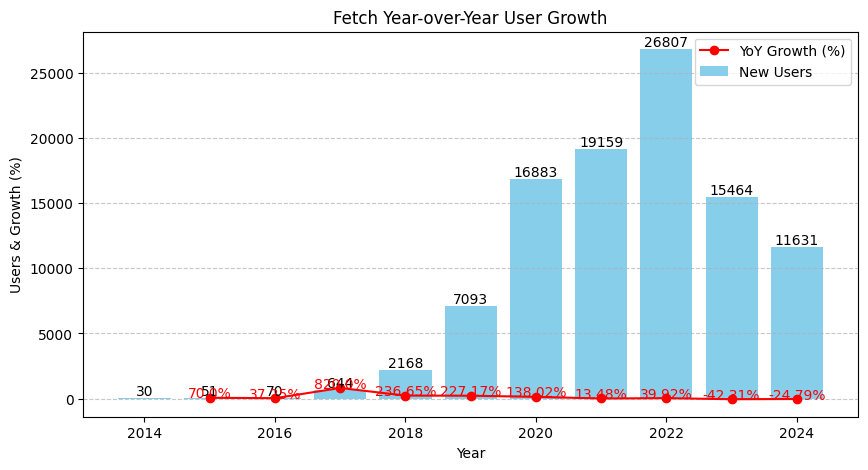


Fetch's Year-over-Year User Growth:
  year  new_users  yoy_growth
 2014         30         NaN
 2015         51       70.00
 2016         70       37.25
 2017        644      820.00
 2018       2168      236.65
 2019       7093      227.17
 2020      16883      138.02
 2021      19159       13.48
 2022      26807       39.92
 2023      15464      -42.31
 2024      11631      -24.79


In [115]:
# Percent has Fetch grown year over year
query6 = '''
WITH user_registration AS (
    SELECT 
        strftime('%Y', created_date) AS year, 
        COUNT(id) AS new_users
    FROM users
    GROUP BY year
),
user_growth AS (
    SELECT 
        year, 
        new_users,
        (new_users - LAG(new_users) OVER (ORDER BY year)) * 100.0 / LAG(new_users) OVER (ORDER BY year) AS yoy_growth
    FROM user_registration
)
SELECT * FROM user_growth;
'''

# Execute query
user_growth_df = pd.read_sql(query6, conn)

# Convert 'year' column to integer for sorting
user_growth_df["year"] = user_growth_df["year"].astype(int)

# Round YoY growth to 2 decimal places
user_growth_df["yoy_growth"] = user_growth_df["yoy_growth"].round(2)

# Plot the Year-over-Year Growth
plt.figure(figsize=(10, 5))
plt.bar(user_growth_df["year"], user_growth_df["new_users"], color='skyblue', label="New Users")
plt.plot(user_growth_df["year"], user_growth_df["yoy_growth"], marker='o', linestyle='-', color='red', label="YoY Growth (%)")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Users & Growth (%)")
plt.title("Fetch Year-over-Year User Growth")
plt.legend()

# Show values on bars
for i, v in enumerate(user_growth_df["new_users"]):
    plt.text(user_growth_df["year"][i], v + 200, str(v), ha='center', fontsize=10)

# Show YoY Growth % on the line
for i, v in enumerate(user_growth_df["yoy_growth"].dropna()):
    plt.text(user_growth_df["year"][i+1], user_growth_df["yoy_growth"][i+1] + 1, f"{v}%", ha='center', fontsize=10, color='red')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print table output
print("\nFetch's Year-over-Year User Growth:\n", user_growth_df.to_string(index=False))